# Question B1 (15 marks)

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
!pip install pytorch_tabular[extra]

  Obtaining dependency information for pytorch_tabular[extra] from https://files.pythonhosted.org/packages/cf/b4/375b18206768d47afdd22c094ab554e3039d83cb7e358907816554fca469/pytorch_tabular-1.1.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonhosted.org/packages/59/1f/4975d1ab3ed2244053876321ef65bc02935daed67da76c6e7d65900772a3/torch-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.0 from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pytorch-lightning<2.2.0,>=2.0.0 from https://files.pythonhosted.org/packages/eb/d5/05587fe09a657e0de57c0127ac14692f3021448f1a1e086797e87ff559b7/pytorch_lightning-2.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for omegaconf>=2.3.0 from https://files.pythonhosted.org/packag


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

1.Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# YOUR CODE HERE


df_train = df[df["year"] <= 2019]
df_val = df[df["year"] == 2020]
df_test = df[df["year"] == 2021]

print("Training data : ",df_train["year"].unique())
print("Validation data : ",df_val["year"].unique())
print("Testing data : ",df_test["year"].unique())

Training data :  [2017 2018 2019]
Validation data :  [2020]
Testing data :  [2021]


2.Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
# YOUR CODE HERE

#Numeric / Continuous features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
#Categorical features: month, town, flat_model_type, storey_range

# Use DataConfig to define the target variable, as well as the names of the continuous and categorical variables.
data_config = DataConfig(
    target=["resale_price"],  
    # target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"],
)

# Use TrainerConfig to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=50,
)

# Use CategoryEmbeddingModelConfig to create a feedforward neural network with 1 hidden layer containing 50 neurons.
model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",  # Number of nodes in each layer
    #activation="LeakyReLU",  # Activation between each layers
    #learning_rate=1e-3,
)

# Use OptimizerConfig to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
optimizer_config = OptimizerConfig(
    optimizer="Adam" #Default
)

# Use TabularModel to initialise the model and put all the configs together.
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabular_model.fit(train=df_train, validation=df_val)
result = tabular_model.evaluate(df_test)
pred_df = tabular_model.predict(df_test)
#tabular_model.save_model("examples/basic")
#loaded_model = TabularModel.load_model("examples/basic")

2024-03-09 18:54:29,387 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-03-09 18:54:29,414 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-03-09 18:54:29,438 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-03-09 18:54:29,583 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: CategoryEmbeddingModel

2024-03-09 18:54:29,624 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-03-09 18:54:30,423 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

Missing logger folder: C:\Users\Hendy\Desktop\SC4001\Assignments\lightning_logs
C:\Users\Hendy\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\Hendy\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at C:\Users\Hendy\Desktop\SC4001\Assignments\.lr_find_8acc6284-cbce-48fe-83da-7cf606aaaaeb.ckpt
Restored all states from the checkpoint at C:\Users\Hendy\Desktop\SC4001\Assignments\.lr_find_8acc6284-cbce-48fe-83da-7cf606aaaaeb.ckpt


2024-03-09 18:54:35,117 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2024-03-09 18:54:35,120 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2024-03-09 18:54:49,533 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-03-09 18:54:49,536 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

Output()

C:\Users\Hendy\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       6465972736.0        │
│  test_mean_squared_error  │       6465972736.0        │
└───────────────────────────┴───────────────────────────┘

3.Report the test RMSE error and the test R2 value that you obtained.



In [6]:
# YOUR CODE & RESULT HERE

import math
from sklearn.metrics import r2_score, mean_squared_error

print("RMSE: ", math.sqrt(mean_squared_error(df_test['resale_price'], pred_df['resale_price_prediction'])))
print("R2: ", r2_score(df_test['resale_price'], pred_df['resale_price_prediction']))


RMSE:  80411.27077080973
R2:  0.7555578483297629


In [5]:
pred_df

,resale_price_prediction
87370,136601.46875
87371,166652.90625
87372,299092.68750
87373,294914.81250
87374,266336.78125
...,...
116422,574843.93750
116423,574533.56250
116424,636705.56250
116425,691219.75000


4.Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [10]:
# YOUR CODE & RESULT HERE

df_test['predictions_result'] = pred_df['resale_price_prediction']
df_test['error'] = (df_test['resale_price'] - df_test['predictions_result'])**2  # (d-y)^2
largest_error = df_test.sort_values(by=['error'], ascending=False).head(25)
largest_error

C:\Users\Hendy\AppData\Local\Temp\ipykernel_18904\4188349872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictions_result'] = pred_df['resale_price_prediction']
C:\Users\Hendy\AppData\Local\Temp\ipykernel_18904\4188349872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['error'] = (df_test['resale_price'] - df_test['predictions_result'])**2  # (d-y)^2


,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,predictions,predictions_result,error
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,360914.68750,360914.68750,1.756325e+11
105372,2,2021,QUEENSTOWN,46 STIRLING ROAD,Commonwealth,0.570988,4.922054,0.016807,0.005350,"4 ROOM, Terrace",46.916667,134.0,01 TO 03,975000.0,561211.68750,561211.68750,1.712208e+11
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,560444.93750,560444.93750,1.661011e+11
105869,8,2021,QUEENSTOWN,42 STIRLING ROAD,Queenstown,0.554599,4.841933,0.016807,0.008342,"4 ROOM, Terrace",46.416667,120.0,01 TO 03,930000.0,535871.56250,535871.56250,1.553372e+11
106057,10,2021,QUEENSTOWN,92 DAWSON ROAD,Queenstown,0.584731,3.882019,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.500000,97.0,13 TO 15,958000.0,574577.00000,574577.00000,1.470132e+11
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,549269.43750,549269.43750,1.449558e+11
105696,6,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,10 TO 12,950000.0,583298.43750,583298.43750,1.344700e+11
92442,11,2021,BUKIT MERAH,127D KIM TIAN ROAD,Tiong Bahru,0.686789,2.664024,0.016807,0.047782,"5 ROOM, Improved",90.333333,113.0,16 TO 18,1165000.0,799521.93750,799521.93750,1.335742e+11
105702,6,2021,QUEENSTOWN,150 MEI LING STREET,Queenstown,0.245207,4.709043,0.016807,0.008342,"EXECUTIVE, Apartment",73.416667,148.0,10 TO 12,1235000.0,869783.50000,869783.50000,1.333831e+11
105699,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,31 TO 33,1032888.0,670265.93750,670265.93750,1.314948e+11


In [55]:
#print(largest_error.groupby(['town', 'nearest_stn']).size())
aggregations = {'error' : ['count','mean'],
                'dist_to_nearest_stn': ['mean'],
                'dist_to_dhoby': ['mean']
                #'degree_centrality': ['mean'],
                #'eigenvector_centrality': ['mean'],
                #'remaining_lease_years': ['mean'],
                #'floor_area_sqm': ['mean'],
               }

grouped = largest_error.groupby(['town','flat_model_type', 'storey_range']).agg(aggregations)
# Flatten multi-level column index
grouped.columns = ['count_distinct', 'error_mean',
                   'dist_to_nearest_stn_mean',
                   'dist_to_dhoby_mean'
                   #'degree_centrality_mean',
                   #'eigenvector_centrality_mean',
                   #'remaining_lease_years_mean',
                   #'floor_area_sqm_mean'
                  ]
grouped = grouped.reset_index()
grouped

,town,flat_model_type,storey_range,count_distinct,error_mean,dist_to_nearest_stn_mean,dist_to_dhoby_mean
0,ANG MO KIO,"5 ROOM, Improved",28 TO 30,1,1.210116e+11,0.860056,7.263401
1,BUKIT BATOK,"EXECUTIVE, Apartment",10 TO 12,1,1.219186e+11,1.292540,10.763777
2,BUKIT MERAH,"3 ROOM, Standard",01 TO 03,2,1.421710e+11,0.525178,2.337504
3,BUKIT MERAH,"5 ROOM, Improved",16 TO 18,1,1.335742e+11,0.686789,2.664024
4,BUKIT MERAH,"5 ROOM, Improved",28 TO 30,1,1.143695e+11,0.586629,2.932814
5,BUKIT MERAH,"5 ROOM, Improved",34 TO 36,1,1.249362e+11,0.451387,2.128424
6,QUEENSTOWN,"4 ROOM, Premium Apartment Loft",04 TO 06,1,1.661011e+11,0.658035,3.807573
7,QUEENSTOWN,"4 ROOM, Premium Apartment Loft",07 TO 09,2,1.261889e+11,0.745596,3.720593
8,QUEENSTOWN,"4 ROOM, Premium Apartment Loft",10 TO 12,3,1.272117e+11,0.687246,3.778490
9,QUEENSTOWN,"4 ROOM, Premium Apartment Loft",13 TO 15,1,1.470132e+11,0.584731,3.882019


In [47]:
good_result = df_test.sort_values(by=['error'], ascending=True).head(25)
good_result

grouped2 = good_result.groupby(['town','flat_model_type', 'storey_range']).agg(aggregations)
# Flatten multi-level column index
grouped2.columns = ['count_distinct', 'error_mean',
                   'dist_to_nearest_stn_mean',
                   'dist_to_dhoby_mean',
                   #'degree_centrality_mean',
                   #'eigenvector_centrality_mean',
                   #'remaining_lease_years_mean',
                   #'floor_area_sqm_mean'
                  ]
grouped2 = grouped2.reset_index()
grouped2

,town,flat_model_type,storey_range,count_distinct,error_mean,dist_to_nearest_stn_mean,dist_to_dhoby_mean
0,ANG MO KIO,"3 ROOM, New Generation",04 TO 06,1,63.003906,0.323979,7.523313
1,BEDOK,"4 ROOM, DBSS",07 TO 09,1,112.890625,0.395285,9.364614
2,BEDOK,"4 ROOM, Premium Apartment",19 TO 21,1,725.628906,0.489311,10.996686
3,BUKIT MERAH,"4 ROOM, Model A",37 TO 39,1,7288.890625,0.686789,2.664024
4,BUKIT MERAH,"5 ROOM, Improved",07 TO 09,1,435.765625,0.627268,4.022446
5,BUKIT MERAH,"5 ROOM, Standard",19 TO 21,1,2493.753906,0.762104,2.960033
6,BUKIT PANJANG,"EXECUTIVE, Premium Apartment",10 TO 12,1,8812.515625,1.586920,12.830023
7,CENTRAL AREA,"3 ROOM, Improved",19 TO 21,1,60.062500,0.210457,0.932328
8,CLEMENTI,"4 ROOM, New Generation",10 TO 12,1,10712.250000,1.166358,9.363462
9,GEYLANG,"3 ROOM, Improved",07 TO 09,1,106.347656,0.537411,6.986591


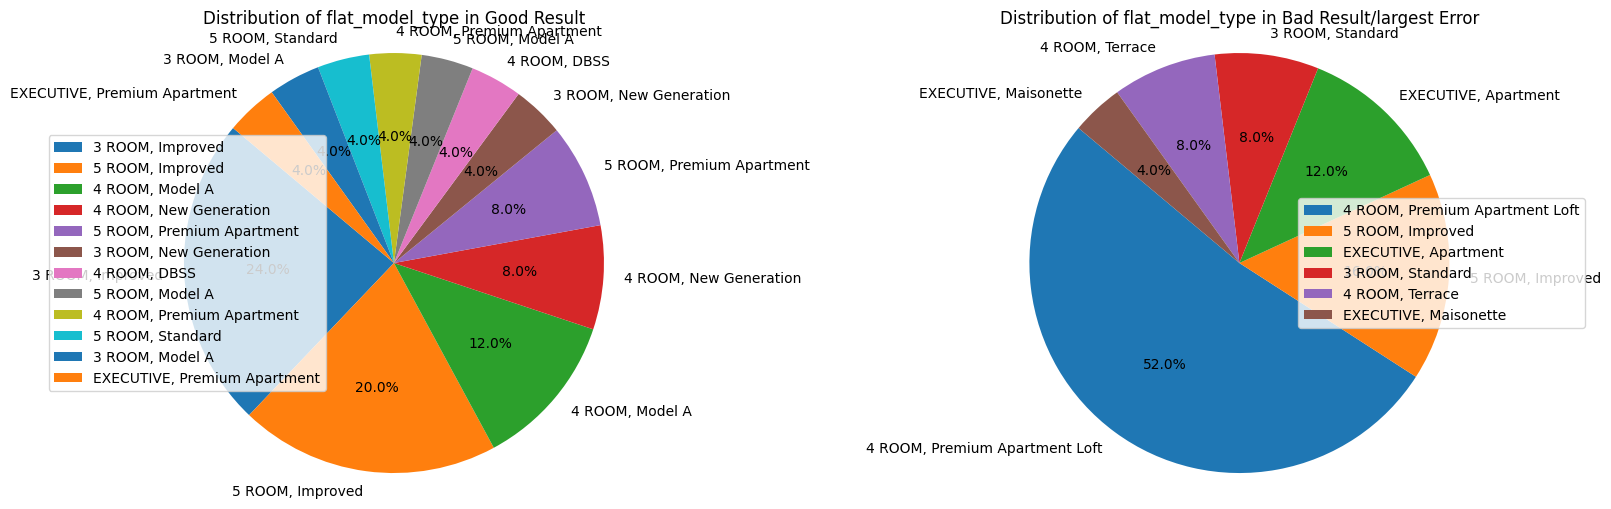

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.pie(good_result['flat_model_type'].value_counts(), labels=good_result['flat_model_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of flat_model_type in Good Result')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

# Second subfigure plot training and test accuracy against epochs
plt.subplot(1, 2, 2)
plt.pie(largest_error['flat_model_type'].value_counts(), labels=largest_error['flat_model_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of flat_model_type in Bad Result/largest Error')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

plt.show()

<b>Solutions </b>

From the provided dataset, it's evident that properties with premium features like upscale flat types and close proximity to Dhoby Ghaut and MRT Stations tend to command higher resale prices. Consequently, these attributes are associated with higher prediction errors, suggesting that the model consistently underestimates their resale value.

This observation is further supported by the plotted piechart, revealing majority of the largest mean square error between 'resale_price' and 'predictions_result' is coming from premium building such as ( 4 ROOM, Premium Apartment Loft ).

To address this issue, several strategies can be implemented:

1) Data Sampling: The limited number of samples for high-priced premium properties may lead to insufficient information for accurate predictions. Additionally, the model might be overfitting to the dataset, which primarily consists of standard properties.

2) Feature Engineering: Properties with premium attributes often possess a valuation that transcends individual features. Therefore, incorporating interaction terms to capture the combined effect of different features on resale price can enhance predictive accuracy.

3) Implemented a strict Numeric/Continuous valuation based flat model type can improve the prediction and reduce the error.  

In [56]:
tabular_model.save_model("saved_models/B1_Model")